# Contact Example

How to run contacts using the brahe library, with some additional functions in this repository!

First, make sure to install the brahe library:

```bash
pip install git+https://github.com/duncaneddy/brahe.git@master matplotlib ipympl cartopy
```

## Setup Imports

(not relevant to repo, can skip) 

Adding module path to run correctly in examples folder

In [2]:
import sys
import os

# Add the path to the folder containing the module
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/loc-gsopt/src


## Imports & Downloading latest Earth Orientation Data

In [7]:
from common.sat_gen import make_tle
from common.station_gen import gs_json
from common.utils import load_earth_data

# Brahe Imports
import brahe as bh
import brahe.data_models as bdm
import brahe.access.access as ba

%matplotlib inline
import matplotlib.pyplot as plt

# Setup info
load_earth_data('data/iau2000A_finals_ab.txt')

Loading the latest Earth Orientation Data


## Generate Satellites Using TLEs

In [4]:
##### Trying to generate a satellite just through tles ######

# Create a TLE
epc0 = bh.Epoch(2024, 5, 20, 0, 0, 0) # This is the epoch of the orbital elements
alt  = 550 # Altitude in km
ecc  = 0.01 # Eccentricity - Generally don't want it to be 0, so give it a small value 0.0001 to 0.01
inc  = 53 # Inclination in degrees
raan = 15 # Right Ascension of the Ascending Node in degrees
argp = 30 # Argument of Perigee in degrees
M    = 45 # Mean Anomaly in degrees
norad_id = 99999 # NORAD ID of the satellite - This is just a placeholder, but we need a number.

tle = make_tle(epc0, alt, ecc, inc, raan, argp, M, norad_id=norad_id)

print(f'Our TLE looks like:\n {tle.line1}\n {tle.line2}\n')

sat1 = bdm.Spacecraft(
    id=99999, # Might need to change this at one point
    name="Sat1",
    line1=tle.line1,
    line2=tle.line2,
)

Our TLE looks like:
 1 99999U          24141.00000000  .00000000  00000-0  00000-0 0    00
 2 99999  53.0000  15.0000 0100000  30.0000  45.0000 15.05490874    07



In [12]:
from common.sat_gen import satellites_from_constellation

satellites = satellites_from_constellation("ICEYE")[0:10]

## Load Ground Station Locations and Compute Contacts

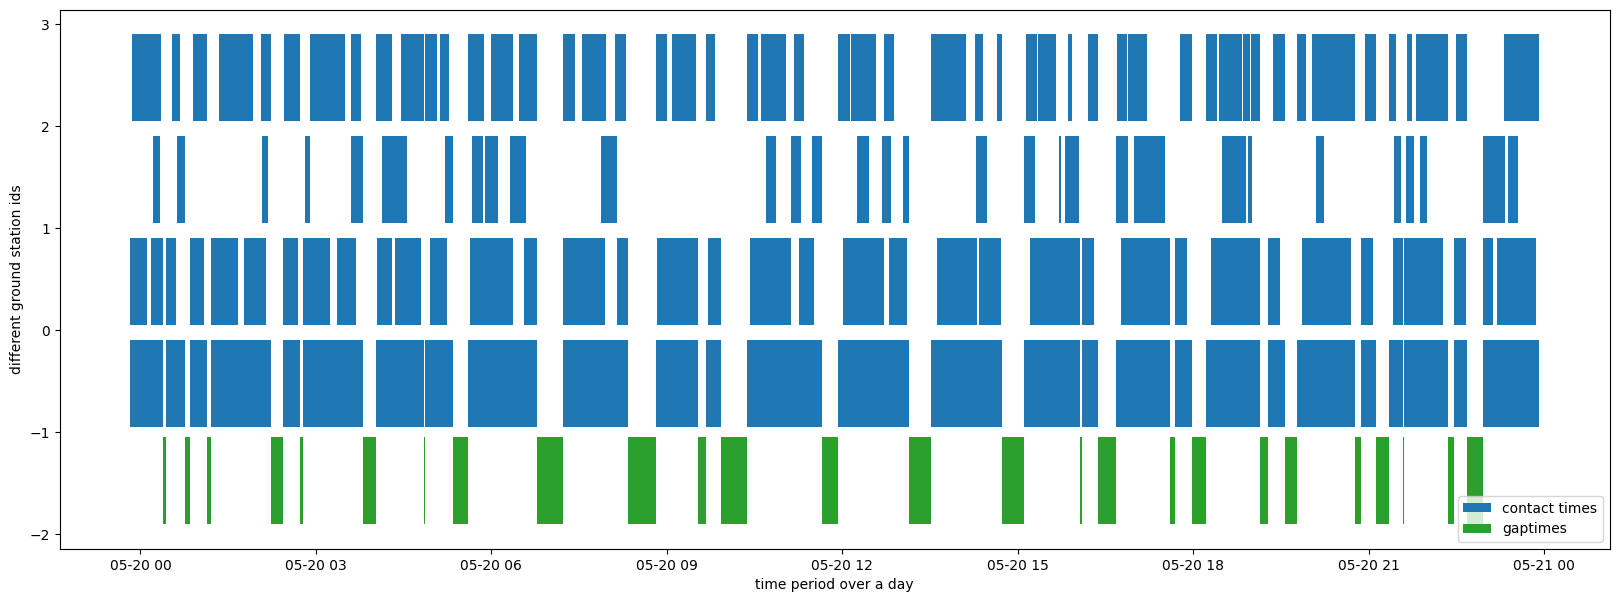

In [16]:

from common.station_gen import return_bdm_gs
fig, ax = fig, ax =  plt.subplots(figsize=(20,7))

# Ground station Locations
# stations = gs_json('groundstations/atlas.json')
stations = []
gs_list = [[27.93191677601733, -90.0], [149.5319919768149, -34.95112833568945], [-62.12542155752943, -69.20261479053809]]
#[[92.44410570135645, -90.0], [-68.17384533868844, -89.98132260158941], [-51.260167274781224, -89.9645197301773]]
for gs in gs_list:
    stations.append(return_bdm_gs(gs[0], gs[1]))

# Computing Contacts for only one day
epc1 = epc0 + 86400
contacts_all = []


for station,id in zip(stations,range(len(stations))):
    for sat,id_sat in zip(satellites,range(len(satellites))):
        contacts = ba.find_location_accesses(sat,station,epc0,epc1)
        for contact in contacts:
            contacts_all.append(contact)
        ax.broken_barh([(contacts[i].t_start,contacts[i].t_end-contacts[i].t_start) for i in range(len(contacts))], (id+0.05, 0.85),facecolors='tab:blue')

ax.broken_barh([(contacts_all[i].t_start,contacts_all[i].t_end-contacts_all[i].t_start) for i in range(len(contacts_all))], (-0.95, 0.85),facecolors='tab:blue', label = "contact times")

sorted_contacts = sorted(contacts_all, key=lambda t: t.t_start)
all_gap_times = []

current_t_end = sorted_contacts[0].t_end
for contact in sorted_contacts:
    if current_t_end < contact.t_end and current_t_end > contact.t_start:
        current_t_end = contact.t_end
    if current_t_end < contact.t_start:
        all_gap_times.append((current_t_end,contact.t_start))
        current_t_end = contact.t_end

ax.broken_barh([(all_gap_times[i][0],all_gap_times[i][1]-all_gap_times[i][0]) for i in range(len(all_gap_times))], (-1.9, 0.85),facecolors='tab:green',label = "gaptimes")

plt.ylabel("different ground station ids")
plt.xlabel("time period over a day")
plt.legend()
plt.show()


In [14]:
[(all_gap_times[i][0],all_gap_times[i][1]-all_gap_times[i][0]) for i in range(len(all_gap_times))]

[(datetime.datetime(2024, 5, 20, 0, 6, 20, 300903),
  datetime.timedelta(seconds=285, microseconds=93384)),
 (datetime.datetime(2024, 5, 20, 0, 22, 55, 440673),
  datetime.timedelta(seconds=198, microseconds=85327)),
 (datetime.datetime(2024, 5, 20, 0, 36, 11, 993408),
  datetime.timedelta(seconds=871, microseconds=151733)),
 (datetime.datetime(2024, 5, 20, 1, 5, 34, 262695),
  datetime.timedelta(seconds=407, microseconds=250366)),
 (datetime.datetime(2024, 5, 20, 1, 40, 12, 900497),
  datetime.timedelta(seconds=381, microseconds=648641)),
 (datetime.datetime(2024, 5, 20, 1, 58, 24, 590031),
  datetime.timedelta(seconds=31, microseconds=129009)),
 (datetime.datetime(2024, 5, 20, 2, 8, 54, 230393),
  datetime.timedelta(seconds=1055, microseconds=582570)),
 (datetime.datetime(2024, 5, 20, 2, 41, 50, 627840),
  datetime.timedelta(seconds=301, microseconds=403229)),
 (datetime.datetime(2024, 5, 20, 3, 14, 5, 494598),
  datetime.timedelta(seconds=478, microseconds=203898)),
 (datetime.datet